<a href="https://colab.research.google.com/github/AimjGuytidy/WQU-Thesis/blob/main/Rolling_ARIMA_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rolling windows with ARIMA

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('/content/oil.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


DatetimeIndex(['2017-08-25', '2017-08-28', '2017-08-29', '2017-08-30',
               '2017-08-31', '2017-09-01', '2017-09-05', '2017-09-06',
               '2017-09-07', '2017-09-08',
               ...
               '2021-08-17', '2021-08-18', '2021-08-19', '2021-08-20',
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30'],
              dtype='datetime64[ns]', name='Date', length=1005, freq=None)

In [29]:

# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [ ]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=15.436
ARIMA(0, 0, 1) RMSE=9.267
ARIMA(0, 0, 2) RMSE=7.280
ARIMA(0, 1, 0) RMSE=1.279
ARIMA(0, 1, 1) RMSE=1.642
ARIMA(0, 1, 2) RMSE=2.038
ARIMA(0, 2, 0) RMSE=2.853
ARIMA(0, 2, 1) RMSE=1.282
ARIMA(0, 2, 2) RMSE=1.753
ARIMA(1, 0, 0) RMSE=1.266
ARIMA(1, 0, 1) RMSE=1.619
ARIMA(1, 0, 2) RMSE=2.016
ARIMA(1, 1, 0) RMSE=2.169
ARIMA(1, 1, 1) RMSE=2.313
ARIMA(1, 1, 2) RMSE=2.329
ARIMA(1, 2, 0) RMSE=3.987
ARIMA(1, 2, 1) RMSE=2.340
ARIMA(1, 2, 2) RMSE=2.392
ARIMA(2, 0, 0) RMSE=2.148
ARIMA(2, 0, 1) RMSE=2.291
ARIMA(2, 1, 1) RMSE=2.457


predicted=10.200601, expected=13.640000
predicted=14.889013, expected=15.060000
predicted=16.270127, expected=15.990000
predicted=17.166198, expected=12.170000
predicted=13.351006, expected=12.400000
predicted=13.552579, expected=15.040000
predicted=16.152346, expected=19.230000
predicted=20.280303, expected=19.720000
predicted=20.747689, expected=20.470000
predicted=21.470866, expected=24.560000
predicted=25.483143, expected=23.880000
predicted=24.804402, expected=23.680000
predicted=24.596733, expected=24.730000
predicted=25.617540, expected=24.020000
predicted=24.910494, expected=25.760000
predicted=26.609257, expected=25.370000
predicted=26.217625, expected=27.400000
predicted=28.200985, expected=29.440000
predicted=30.192797, expected=31.830000
predicted=32.525155, expected=32.300000
predicted=32.979486, expected=33.560000
predicted=34.205705, expected=34.300000
predicted=34.924226, expected=33.490000
predicted=34.129871, expected=34.700000
predicted=35.307377, expected=32.800000


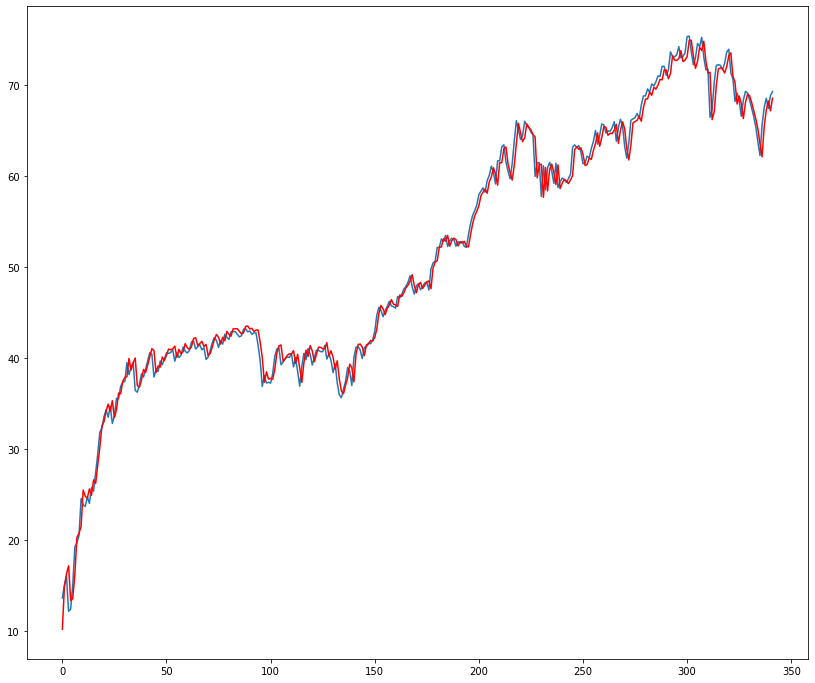

In [3]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.figure(figsize=[14,12])
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [6]:
r2_score(test,predictions)

0.9923303941588748

In [13]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1004
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2394.730
Date:                Mon, 18 Oct 2021   AIC                           4795.460
Time:                        08:55:41   BIC                           4810.195
Sample:                             0   HQIC                          4801.059
                               - 1004                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.6679      7.062      7.883      0.000      41.828      69.508
ar.L1          0.9780      0.003    360.192      0.000       0.973       0.983
sigma2         6.8853      0.031    220.934      0.000       6.824       6.946
===================================================================================
Ljung-Box (L1) (Q):                 100.92   Jarque-Bera (JB):           3373757.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -5.20
Prob(H) (two-sided):                  0.33   Kurtosis:                       286.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""